In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

os.chdir("../")

from epitools import get_data
from plots import set_plot

In [5]:
geography_id = "region_id"
country = "Chile"
output = []
# [2002, 2007, 2012, 2017, 2022]
for year in [2013, 2017, 2021]:

    df_1r = get_data(
        country=country,
        aggregation=geography_id,
        election="first_round",
        year=year
    )

    df_2r = get_data(
        country=country,
        aggregation=geography_id,
        election="runoff",
        year=year
    )

    df = pd.merge(df_1r, df_2r, on=[geography_id, "year"])

    data = df.copy()
    if country == "France":
        data = data[~data["department_id"].str.contains("Z")]
    for col in ["ep", "ec"]:
        data[f"{col}_x"] = (data[f"{col}_x"] - data[f"{col}_x"].mean()) / data[f"{col}_x"].std()
        data[f"{col}_y"] = (data[f"{col}_y"] - data[f"{col}_y"].mean()) / data[f"{col}_y"].std()

    data = data.melt(id_vars=[geography_id, "year"])
    data["type"] = data["variable"].str.replace("_x", "").str.replace("_y", "")
    data["variable"] = data["variable"].str.replace("ep_", "").str.replace("ec_", "")

    data = data.pivot(index=[geography_id, "year", "type"], columns=["variable"], values="value").reset_index()
    output.append(data)

data = pd.concat(output, ignore_index=True)


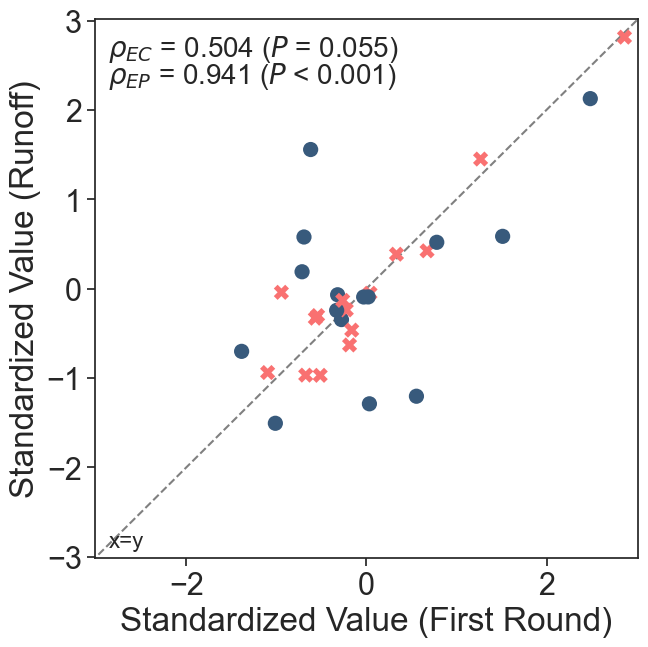

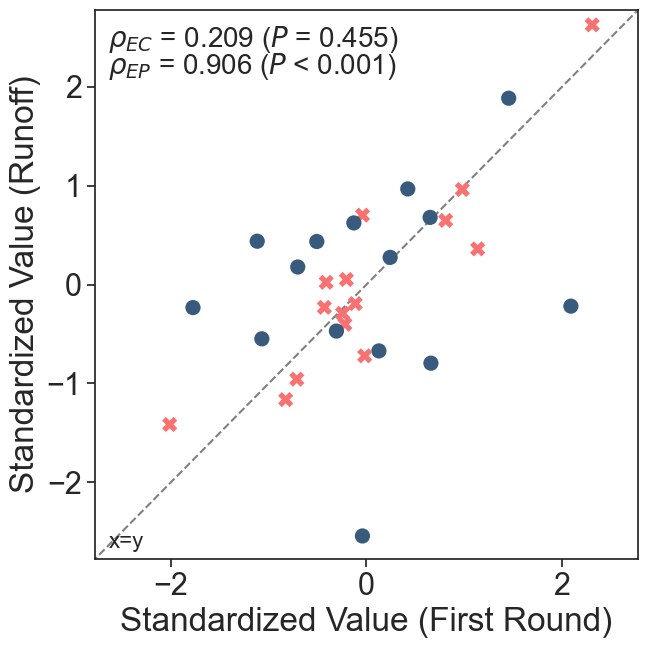

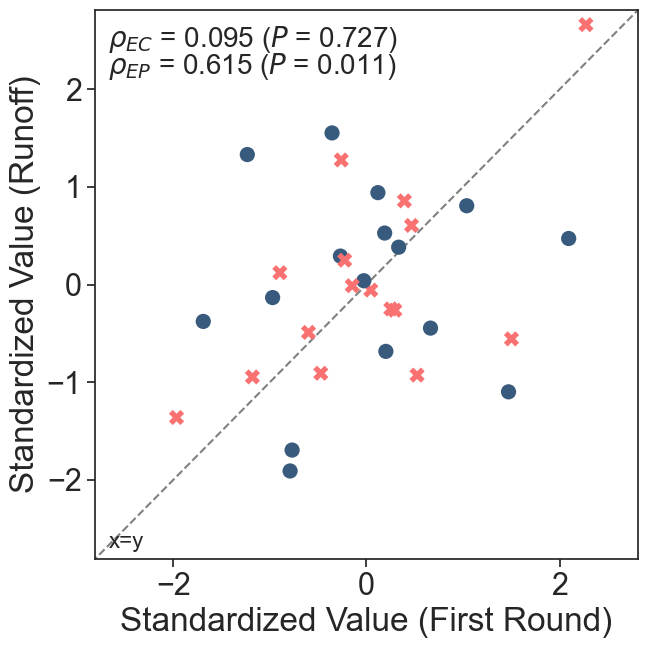

In [6]:
sns.set(font_scale=2, style="ticks")

for year, dt in data.groupby("year"):
    fig, ax = plt.subplots(figsize=(7, 7))
    set_plot(dt, ax, xlabel="Standardized Value (First Round)", ylabel="Standardized Value (Runoff)", labelkey=None)

    fig.tight_layout()

